## Data Science Logistics

### Outline
  * Execution Environment: Run on local PC and remote cloud with CUP/GPU.
  * Libraries: numpy, pandas, scikit-learn, tensorflow, keras.
  * Dataset: Online data sources.
  * Orange (I): Visual Programming Tools, Interactive data exploration with visualizations.


### Execution Environment


####Colab

[Google Colab](https://colab.research.google.com/notebooks/intro.ipynb?hl=zh-tw) allows you to write and execute Python in your browser, with Zero configuration required,  free access to GPUs, and easy sharing.

Google provides a [3-minute video](https://www.youtube.com/watch?v=inN8seMm7UI) introducting Colab.

Here are some important functoinalities you MUST know before using colab. <font color="red">They may make you life easier.</font>


* **English** version of Colab can be found in "說明" (Help).
* At the left-hand side of colab, a tab named "**Code Snippets**" ("<>") can search and insert code snippets example to your colab. For example, you can search "visualization" to find several ploting code snippets.
* You can link your [**Google Drive**](https://pythonhosted.org/PyDrive/) to your colab, or [**GitHub**](https://docs.github.com/en/github/authenticating-to-github/keeping-your-account-and-data-secure/creating-a-personal-access-token).
* Colab is built on the top of Linux OS. You can execute **Linux command** in colab by placing a "!" in front of your command, like the following example. All the listed commands can be used in your code.


In [ ]:
!ls /bin/

bash	       hostname       su
bunzip2        journalctl     sync
bzcat	       kill	      systemctl
bzcmp	       kmod	      systemd
bzdiff	       less	      systemd-ask-password
bzegrep        lessecho       systemd-escape
bzexe	       lessfile       systemd-hwdb
bzfgrep        lesskey	      systemd-inhibit
bzgrep	       lesspipe       systemd-machine-id-setup
bzip2	       ln	      systemd-notify
bzip2recover   login	      systemd-sysusers
bzless	       loginctl       systemd-tmpfiles
bzmore	       ls	      systemd-tty-ask-password-agent
cat	       lsblk	      tar
chgrp	       lsmod	      tempfile
chmod	       mkdir	      touch
chown	       mknod	      true
cp	       mktemp	      udevadm
dash	       more	      ulockmgr_server
date	       mount	      umount
dd	       mountpoint     uname
df	       mv	      uncompress
dir	       networkctl     vdir
dmesg	       nisdomainname  wdctl
dnsdomainname  pidof	      which
domainname     ps	      ypdomainname
echo	       pwd	      zcat
egrep	     

* Interactive Python provides lots of '**magic commands**, starts with "%". Check it out [here](https://nbviewer.jupyter.org/github/ipython/ipython/blob/1.x/examples/notebooks/Cell%20Magics.ipynb).
  * time and timeit are very useful for evaluating code performance.

In [ ]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %shell  %store  %sx  %system  %tb  %tensorflow_version  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%bigquery  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%perl 

* You may use HTML tags, like <font color="red">this</font>.
* Plot vectored figure (SVG) by leveraging html magic command.

In [ ]:
%%html
<svg xmlns="http://www.w3.org/2000/svg" viewBox="0 0 450 400" width="200" height="200">
  <rect x="80" y="60" width="250" height="250" rx="20" style="fill:red; stroke:black; fill-opacity:0.7" />
  <rect x="180" y="110" width="250" height="250" rx="40" style="fill:blue; stroke:black; fill-opacity:0.5;" />
</svg>

* High quality $\LaTeX$ symbols, such as $$\zeta(s) = \sum_{n=1}^{\infty}{\frac{1}{n^s}}$$.

####CPU and GPU

First, you need to enable GPUs for this colab:
[Runtime] $\rightarrow$ [Change runtime type] $\rightarrow$ [Hardware accelerator], select GPU from the drop-down.

[執行階段] $\rightarrow$ [變更執行階段類型] $\rightarrow$ [硬體加速] 選擇 GPU。


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.5.0


In [ ]:
for p in tf.config.list_physical_devices():
  print(p)
for l in tf.config.experimental.list_logical_devices():
  print(l)

PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')
PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')
LogicalDevice(name='/device:CPU:0', device_type='CPU')
LogicalDevice(name='/device:GPU:0', device_type='GPU')


In [ ]:
# A simple function for performance testing

import time

def performanceTest(device_name, size=500):
    # by using 'with' tf.device, we can explictly assign the computation task
    # to a device, i.e., CPU or GPU
    with tf.device(device_name):
        W = tf.random.normal([size, size], name = 'W')
        X = tf.random.normal([size, size], name = 'X')
        mul = tf.matmul(W, X, name = 'mul') # <- matmul() has CPU & GPU version.
        return tf.reduce_sum(mul, name = 'sum')

# We run each op once to warm up; see: https://stackoverflow.com/a/45067900
g = performanceTest("/device:GPU:0")
c = performanceTest("/cpu:0")

<tf.Tensor: shape=(), dtype=float32, numpy=-8028.3247>

In [ ]:
import timeit

gpu_li = []
cpu_li = []
x_li = []

# iteratively execute performanceTest() with different size of parameter
for x in range(0, 4001, 500):
    g = timeit.timeit(stmt = "performanceTest('device:GPU:0', {})".format(x),
                      setup = "from __main__ import performanceTest",
                      number = 1)
    c = timeit.timeit(stmt =  "performanceTest('cpu:0', {})".format(x),
                      setup = "from __main__ import performanceTest",
                      number = 1)
    x_li.append(x)
    gpu_li.append(g)
    cpu_li.append(c)

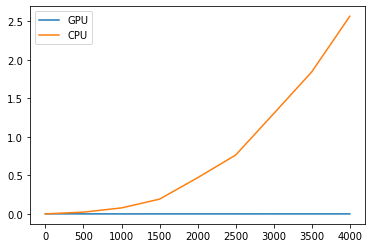

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(x_li, gpu_li, label = 'GPU')
plt.plot(x_li, cpu_li, label = 'CPU')
plt.legend()

### Libraries

<table border = "1" width="800">
<tr>
<td width="80">Package</td>
<td width="720">Description</td>
</tr>
<tr>
<td>Numpy</td>
<td><a href="https://numpy.org/doc/stable/reference/index.html">NumPy</a> is the fundamental package for scientific computing with Python. It contains among other things: a powerful N-dimensional <br/> array object; sophisticated (broadcasting) functions; tools for integrating C/C++ code useful linear algebra, Fourier transform, and <br/> random number capabilities. Besides its obvious scientific uses, NumPy can also be used as an efficient multi-dimensional container <br/> of generic data. Arbitrary data-types can be defined. This allows NumPy to seamlessly and speedily integrate with a wide variety of <br/> databases. </td>
</tr>
<tr>
<td>SciPy</td>
<td><a href="https://docs.scipy.org/doc/scipy/reference/">SciPy</a> is a collection of mathematical algorithms and convenience functions built on the Numpy extension of Python. It adds <br/> significant power to the interactive Python session by providing the user with high-level commands and classes for manipulating and <br/> visualizing data. With SciPy an interactive Python session becomes a data-processing and system-prototyping environment <br/> rivaling systems such as MATLAB, IDL, Octave, R-Lab, and SciLab. </td>
</tr>
<tr>
<td>Matplotlib</td>
<td><a href="https://matplotlib.org/">Matplotlib</a> is a Python 2D/3D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive <br/> environments across platforms. Matplotlib can be used in Python scripts, the Python and IPython shell, the jupyter notebook, web <br/> application servers, and four graphical user interface toolkits.</td>
</tr>
<tr>
<td>Pandas</td>
<td><a href="https://pandas.pydata.org/pandas-docs/stable/">pandas</a> is a Python package providing fast, flexible, and expressive data structures designed to make working with "relational" or <br/> "labeled" data both easy and intuitive. It aims to be the fundamental high-level building block for doing practical, real world <br/> data analysis in Python. </td>
</tr>
<tr>
<td>Statsmodels</td>
<td><a href="https://www.statsmodels.org/stable/index.html">statsmodels</a> is a Python module that provides classes and functions for the estimation of many different statistical models, as well as <br/> for conducting statistical tests, and statistical data exploration. </td>
</tr>
<tr>
<td>Scikit-Learn</td>
<td><a href="https://scikit-learn.org/stable/">Scikit-learn</a> is an open source machine learning library that supports supervised and unsupervised learning. It also provides various <br/> tools for model fitting, data preprocessing, model selection and evaluation, and many other utilities.	</td>
</tr>
<tr>
<td>Keras</td>
<td><a href="https://keras.io/">Keras</a> is a high-level neural networks library, written in Python and capable of running on top of TensorFlow. It was developed with a <br/> focus on enabling fast experimentation. Being able to go from idea to result with the least possible delay is key to doing good research.</td>
</tr>
<tr>
<td>TensorFlow</td>
<td><a href="https://www.tensorflow.org/">TensorFlow</a> is an end-to-end open source platform for machine learning. It has a comprehensive, flexible ecosystem of tools, libraries <br/> and community resources that lets researchers push the state-of-the-art in ML and developers easily build and deploy ML powered <br/> applications.</td>
</tr>

</table>

###Dataset

* [Google Dataset Search](https://datasetsearch.research.google.com/)
* [Kaggle](https://www.kaggle.com/)
* [UC Irvine Machine Learning Repository](https://archive-beta.ics.uci.edu/)
* [SecRepo.com](http://www.secrepo.com/) - Samples of Security Related Data
* [Detecting Malicious URLs](https://www.sysnet.ucsd.edu/projects/url/)
* [Web Attack Payloads](https://github.com/foospidy/payloads)
* [MalwareTrainingSets](https://github.com/marcoramilli/MalwareTrainingSets)


### Orange (I)

Orange: Interactive data exploration for rapid qualitative analysis with clean visualizations. Graphic user interface allows you to focus on exploratory data analysis instead of coding, while clever defaults make fast prototyping of a data analysis workflow extremely easy. 

* Official [website](https://orangedatamining.com/) 
* [YouTube](https://www.youtube.com/channel/UClKKWBe2SCAEyv7ZNGhIe4g) Channel
  * Getting Started with Orange [Playlist](https://www.youtube.com/watch?v=HXjnDIgGDuI&list=PLmNPvQr9Tf-ZSDLwOzxpvY-HrE0yv-8Fy)
  * Single Cell Orange
  * Text Mining
  * Image Analytics
  * Spectral Orange
  * Covid-19 Series

#### Installation

* Colab does not support running Orange at the remote server. You have to install a local Python execution environment on your PC or laptop.
* [Anaconda](https://www.anaconda.com/products/individual) is reommended, as it distribution already includes lots of pacages, so that we do not need to install them on our own.
* Currently (2021), it is tricky to install anaconda and some machine learning packages on Mac M1. I recommand using non-ARM system to run your codes.
* Follow the instructions from Orange https://orangedatamining.com/download/. Or if you are using Anaconda, you can find Orange in [Anaconda Navigator](https://docs.anaconda.com/anaconda/navigator/).


####Play with data


* Data
  * File (tab, URL, csv)
    * numeric/categorical, feature/target
  * Data Table
  * Paint Data
  * Data Sampler
  * Select Columns (and target), Select Rows
  * Data Info, Rank, Feature Statistics
  * Outliers 
  * Continuize, Discretize
  * Merge Data, Concatenate
  * Transpose
  * Save Data
* Visualize
 * Box Plot
 * Distribution
 * Scatter Plot
 * Linear Projection
* Widget Link
  * Selected Data
